<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face detection using PCA

Here we will try PCA and kernel PCA along with a classification model on a image face recognition task. Images usually have large number of features and PCA techniques can help significantly in reducing the complexity of models.

In [3]:
from sklearn.datasets import fetch_lfw_people

# this command will download the LFW_people's dataset to hard disk.
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# Instead of providing 2D data, X has data already in the form  of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Number of features: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  1288
Number of features:  1850
Number of Class Labels:  7


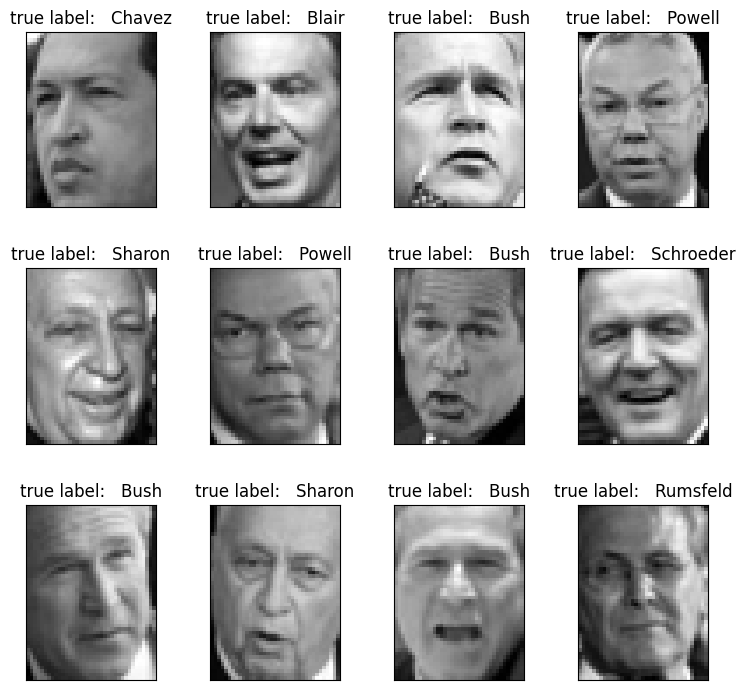

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
# Function to plot images in 3 * 4
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

#Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)

true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

 Split data into training and test sets (70:30 ratio)

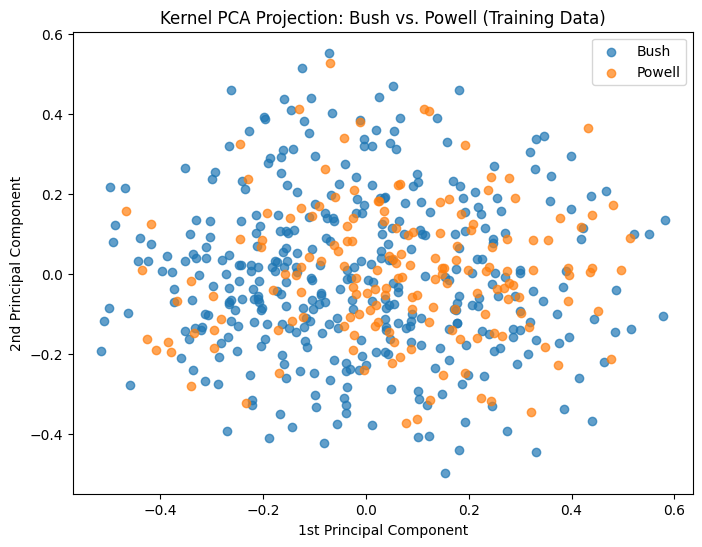

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
## Standardize the data (fit on training data only)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Apply Kernel PCA on the training data
#    - Using RBF kernel with gamma = 1e-4
#    - Reducing data to 30 leading components
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=30, kernel='rbf', gamma=1e-4, random_state=42)
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)

# 5. Visualize transformed training data for "Bush" and "Powell"
# -------------------------------
# Helper function to extract last name
def get_last_name(full_name):
    return full_name.rsplit(' ', 1)[-1]

# Create a list of last names for training samples
train_last_names = [get_last_name(target_names[label]) for label in y_train]

# Find indices for samples with last name "Bush" or "Powell"
indices_bush_powell = [i for i, last_name in enumerate(train_last_names) if last_name in ['Bush', 'Powell']]

plt.figure(figsize=(8, 6))
for name in ['Bush', 'Powell']:
    indices = [i for i in indices_bush_powell if train_last_names[i] == name]
    plt.scatter(X_train_kpca[indices, 0], X_train_kpca[indices, 1], label=name, alpha=0.7)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Kernel PCA Projection: Bush vs. Powell (Training Data)')
plt.legend()
plt.show()

Train the Random forest classifier with n_estimators = 100, max_depth = 15, max_leaf_nodes = 250 over the entire training data (all labels)

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=15, max_leaf_nodes=250, random_state=42)
clf.fit(X_train_kpca, y_train)
y_pred = clf.predict(X_test_kpca)
##Evaluate the Classifier
# -------------------------------
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))

Confusion Matrix:
[[  2  10   0  11   0   0   0]
 [  0  58   0  12   0   0   1]
 [  0   3   7  26   0   0   1]
 [  0   5   0 154   0   0   0]
 [  0   1   1  21   5   0   5]
 [  0   1   0  17   0   1   2]
 [  0   6   0  20   2   0  15]]

Accuracy: 62.53%



ADS Homework 2
Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [19]:
#Load the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [20]:
#original image data is a 2D array
X.shape

(1797, 64)

If we take the first 10 observations and reconstruct the graph and we could see:

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


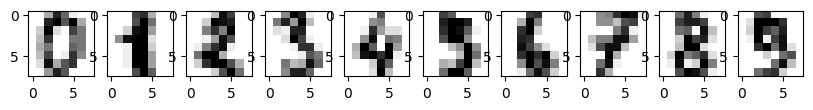

In [21]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

First 5 rows of the DataFrame:
    x1   x2   x3    x4    x5    x6   x7   x8   x9  x10  ...  x55  x56  x57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

   x58  x59   x60   x61   x62  x63  x64  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


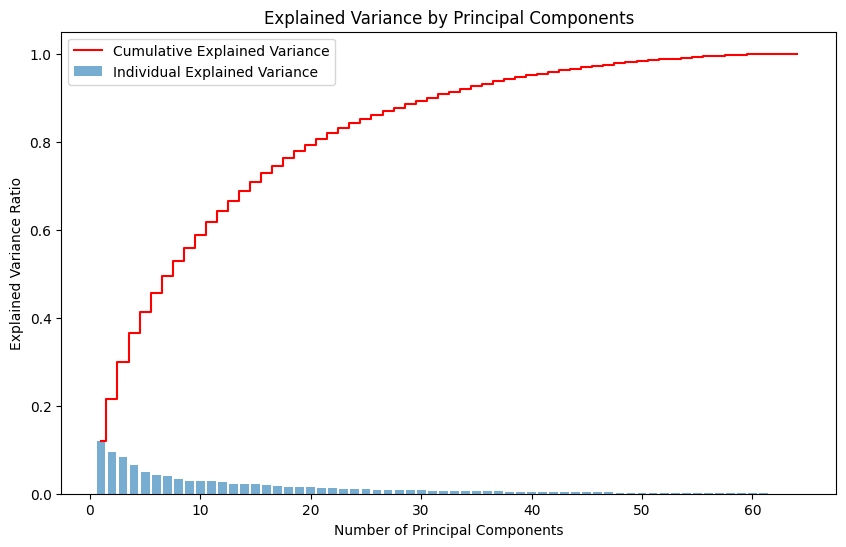

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X = digits.data
y = digits.target

# 1. Load the Data and Prepare the DataFrame
digits = load_digits()
X = digits.data
y = digits.target

# Create a DataFrame with pixel features and set the target variable as the index
data = pd.DataFrame(X, index=y, columns=["x{}".format(i) for i in range(1, X.shape[1] + 1)])
print("First 5 rows of the DataFrame:")
print(data.head())

# 2. Standardize the Pixel Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Perform PCA Decomposition
# -------------------------------
# Used PCA without limiting the number of components to see how much variance each component explains.
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Plot the Explained Variance per Number of Leading PCs
# -------------------------------
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6,
        label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         color='red', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()


##The plot shows that the first few principal components capture a large portion of the total variance.
##For instance, we notice that the cumulative variance increases steeply with the first 10-15 components
##indicating that the high-dimensional data (64 pixels) can be effectively described using a much smaller number of features.


Task 2: Now use three leading PCs to visualize the digits (a 3d scatterplot in PC space with different colors representing different digits)

- reapply PCA with three components so we can visualize in 3 dimensions
- use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html




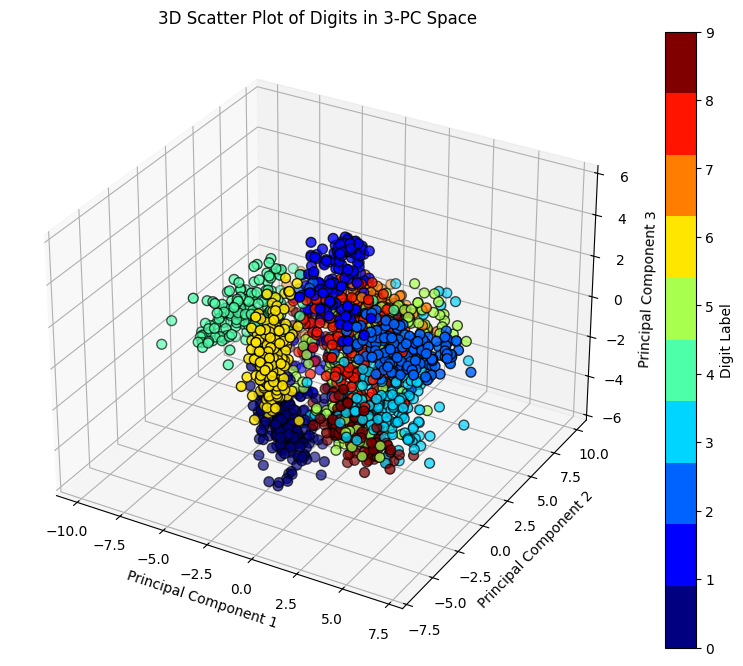

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_scaled)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2],
                     c=y, cmap=plt.cm.get_cmap("jet", 10),
                     edgecolor='k', s=50)

ax.set_title("3D Scatter Plot of Digits in 3-PC Space")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
cbar = fig.colorbar(scatter, ticks=range(10))
cbar.set_label('Digit Label')

plt.show()

Task 3: Find examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of first two PCs (provide 3 examples each on separate plots)

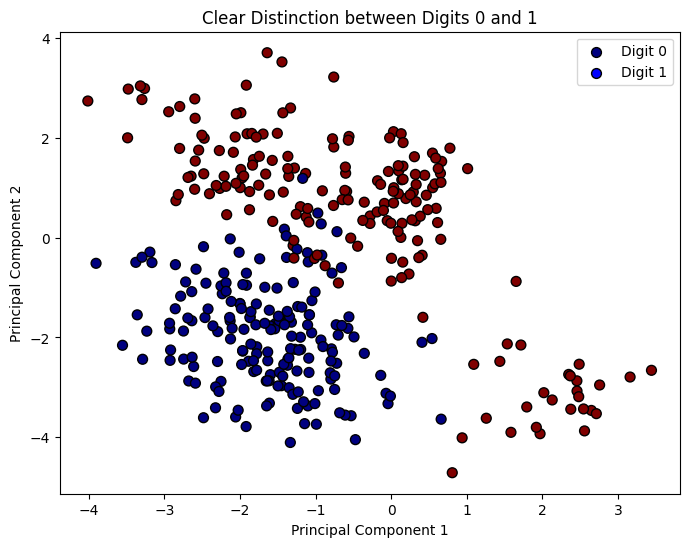

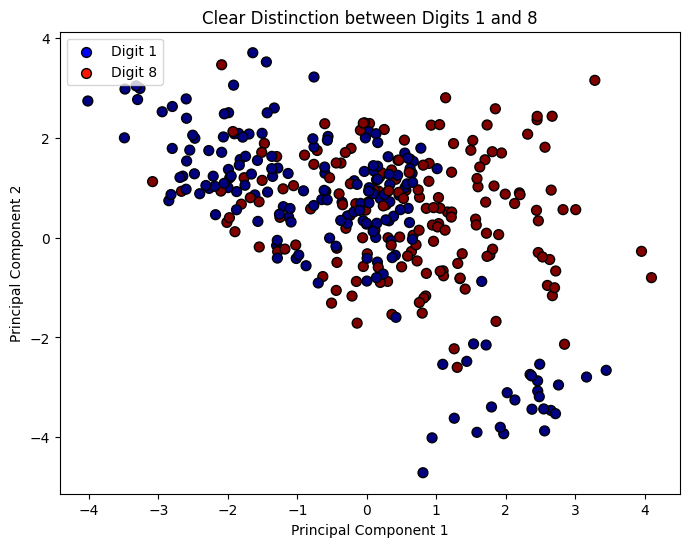

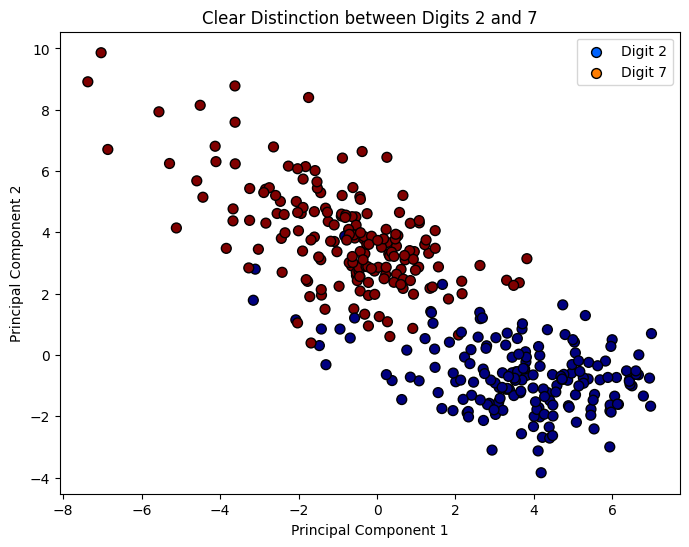

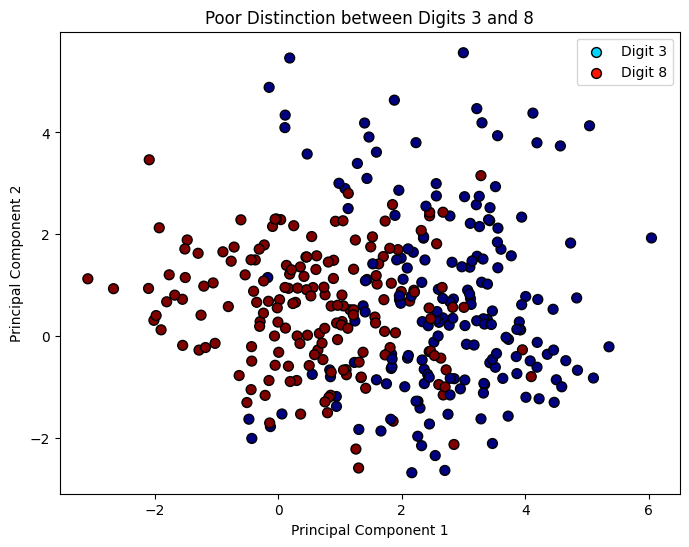

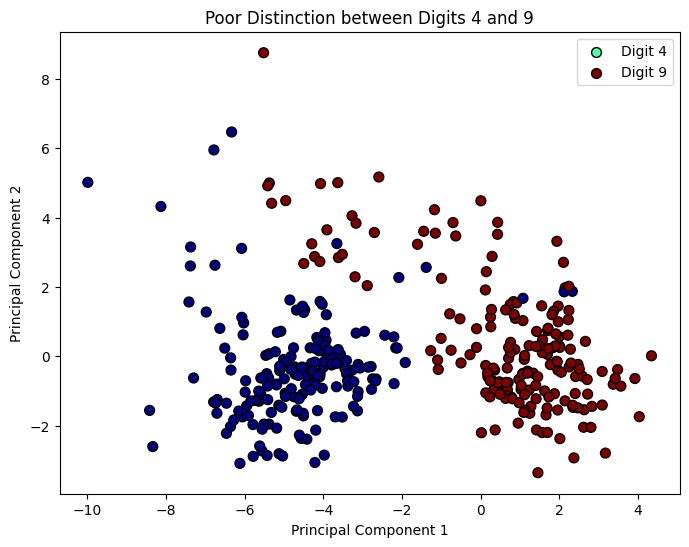

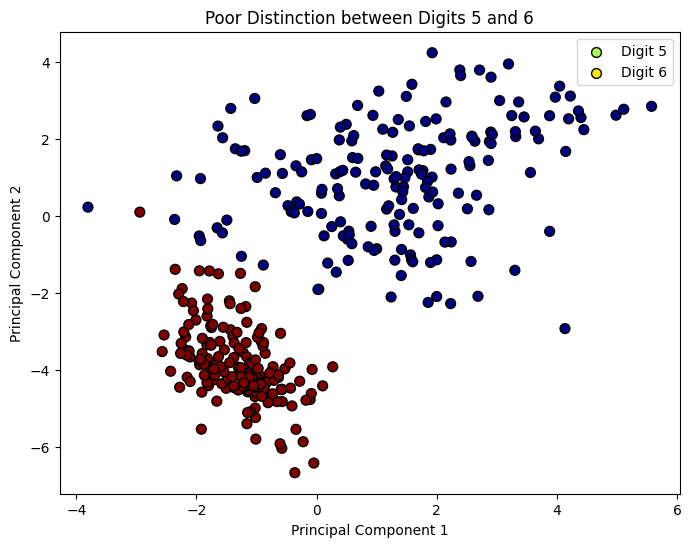

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components for 2D Visualization
pca = PCA(n_components=2, random_state=42)
X_pca2 = pca.fit_transform(X_scaled)

# Define digit pairs for comparison
clear_pairs = [(0, 1), (1, 8), (2, 7)]
unclear_pairs = [(3, 8), (4, 9), (5, 6)]

def plot_digit_pair(pair, title_prefix=""):
    d1, d2 = pair
    # Get indices for the two digits
    indices = np.where((y == d1) | (y == d2))[0]
    plt.figure(figsize=(8, 6))
    # Create scatter plot for the filtered data
    plt.scatter(
        X_pca2[indices, 0], X_pca2[indices, 1],
        c=y[indices],
        cmap=plt.cm.get_cmap("jet", 10),
        edgecolor='k',
        s=50
    )
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"{title_prefix} Distinction between Digits {d1} and {d2}")
    # Create a legend manually for clarity
    for digit in pair:
        plt.scatter([], [], c=plt.cm.get_cmap("jet", 10)(digit/10.),
                    edgecolor='k', label=f"Digit {digit}", s=50)
    plt.legend()
    plt.show()

# Plot clear pairs (digits that can be clearly distinguished)
for pair in clear_pairs:
    plot_digit_pair(pair, title_prefix="Clear")

# Plot unclear pairs (digits that are not clearly distinguished)
for pair in unclear_pairs:
    plot_digit_pair(pair, title_prefix="Poor")